In [2]:
!pip install opencv-python matplotlib


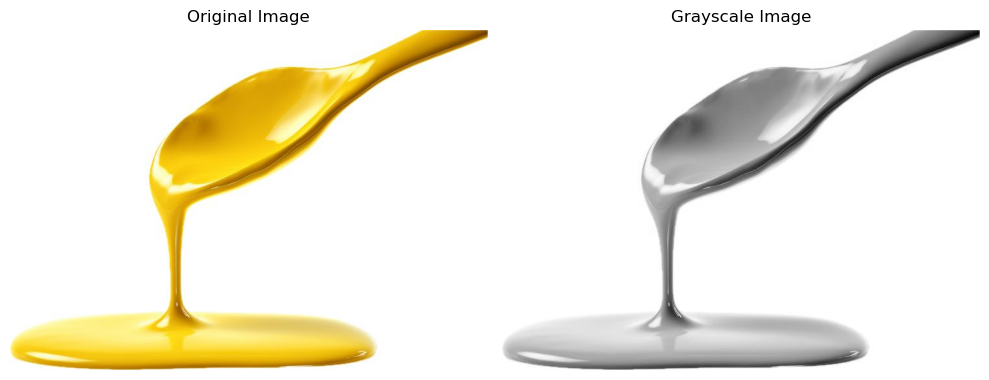

In [21]:
import cv2
import matplotlib.pyplot as plt

# Load the image in color and grayscale
image_color = cv2.imread("object.jpeg")
image_gray = cv2.cvtColor(image_color, cv2.COLOR_BGR2GRAY)

# Convert color for displaying (BGR to RGB)
image_rgb = cv2.cvtColor(image_color, cv2.COLOR_BGR2RGB)

# Show original and grayscale
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image_rgb)
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(image_gray, cmap='gray')
plt.title("Grayscale Image")
plt.axis("off")

plt.tight_layout()
plt.show()


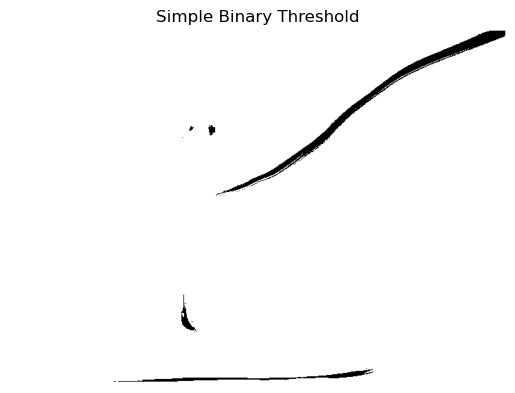

In [23]:
# 1️⃣ Simple Binary Thresholding

# Apply simple thresholding
_, thresh_binary = cv2.threshold(image_gray, 127, 255, cv2.THRESH_BINARY)

# Display result
plt.imshow(thresh_binary, cmap='gray')
plt.title("Simple Binary Threshold")
plt.axis("off")
plt.show()


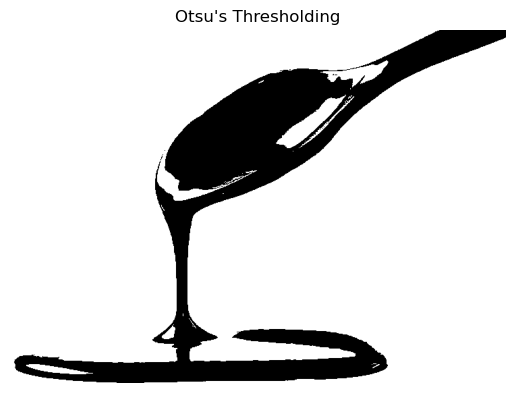

In [25]:
# 2️⃣ Otsu’s Thresholding

# Apply Otsu's thresholding
_, thresh_otsu = cv2.threshold(image_gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Display result
plt.imshow(thresh_otsu, cmap='gray')
plt.title("Otsu's Thresholding")
plt.axis("off")
plt.show()


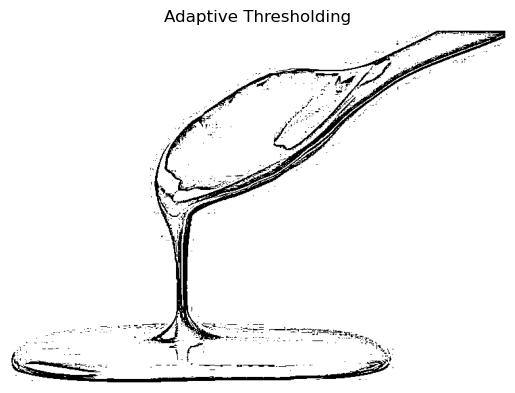

In [27]:
# 3️⃣ Adaptive Thresholding 

# Apply Adaptive thresholding
adaptive_thresh = cv2.adaptiveThreshold(image_gray, 255, 
                                        cv2.ADAPTIVE_THRESH_GAUSSIAN_C, 
                                        cv2.THRESH_BINARY, 11, 2)

# Display result
plt.imshow(adaptive_thresh, cmap='gray')
plt.title("Adaptive Thresholding")
plt.axis("off")
plt.show()


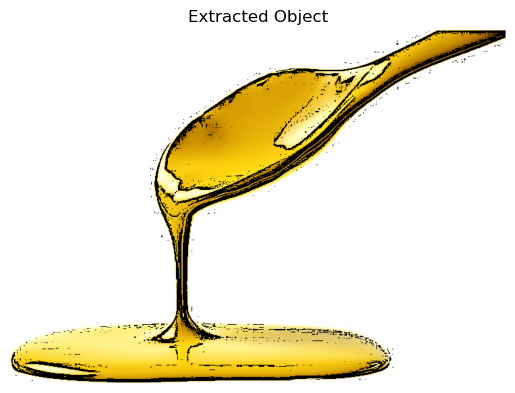

In [29]:
## Extract the Object Using the Threshold as a Mask

import numpy as np

# Invert the adaptive threshold if needed (object must be white)
mask = adaptive_thresh

# Convert grayscale mask to 3-channel (so we can apply to color image)
mask_rgb = cv2.cvtColor(mask, cv2.COLOR_GRAY2BGR)

# Apply mask to original image
extracted_object = cv2.bitwise_and(image_color, mask_rgb)

# Convert to RGB for displaying
extracted_rgb = cv2.cvtColor(extracted_object, cv2.COLOR_BGR2RGB)

# Display the result
plt.imshow(extracted_rgb)
plt.title("Extracted Object")
plt.axis("off")
plt.show()


In [31]:
# Remove Background Completely (Make It Transparent) 

# Create an alpha channel from the mask
alpha = mask.copy()

# Stack color channels and alpha channel together
rgba = cv2.merge((image_color[:, :, 0], image_color[:, :, 1], image_color[:, :, 2], alpha))

# Save as PNG with transparency
cv2.imwrite("object_transparent.png", rgba)
print("Transparent image saved as 'object_transparent.png'")


Transparent image saved as 'object_transparent.png'
